In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn  #> 학습 위해 만들어 놓은 패키지

import warnings
warnings.filterwarnings("ignore")

from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# K-MEANS

    - 비지도 군집(Clustering) 알고리즘: 자체적으로 데이터 패턴 찾아 학습
    
    - 스스로 패턴 찾기 위해 많은 데이터 필요. 전처리에 따른 성능 차이 크다: 상용화 떨어짐
    
    - 실제 구한 데이터에 레이블 없을 경우, 이를 분류하기 위해 사용
    
    - KNN과 공통점: L2 norm 통해 거리 계산 방식

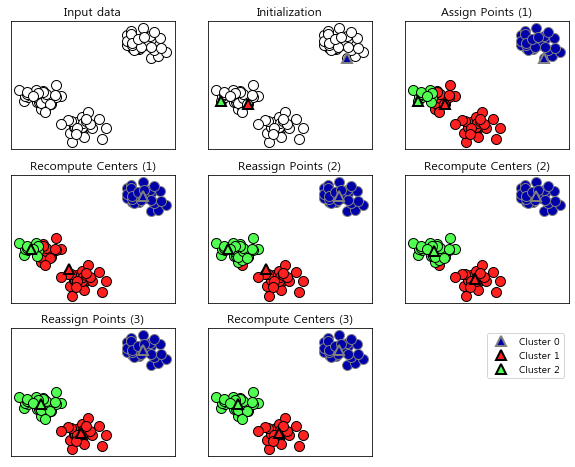

In [2]:
### 중심점 통한 군집화 과정: 기본은 첫 데이터값 기준으로 처음 중심점 설정

mglearn.plots.plot_kmeans_algorithm()

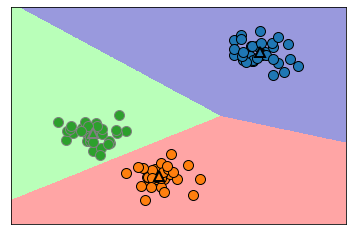

In [3]:
mglearn.plots.plot_kmeans_boundaries()  #> 군집화 구분 경계선 확인

In [13]:
import sklearn
from sklearn.cluster import KMeans

X, y = sklearn.datasets.make_blobs()

In [14]:
km = KMeans(n_clusters=3).fit(X)  #> 지도학습과는 달리 data만 넘겨서 학습

In [17]:
dir(km)  
lbl = km.labels_  #> 스스로 분류한 레이블 확인

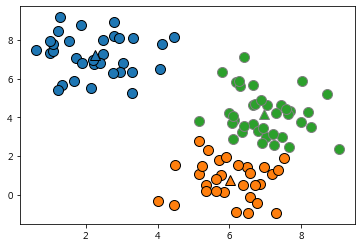

In [19]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers="o")
mglearn.discrete_scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], [0, 1, 2], markers="^")  #> 중심점 표시

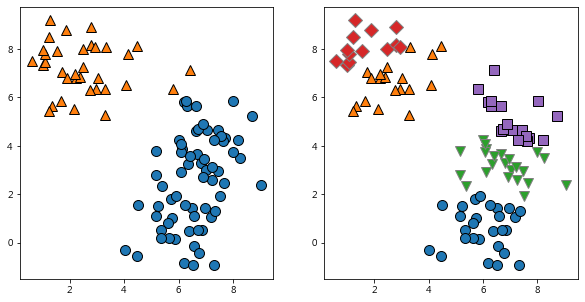

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

idx = 0
for k in [2, 5]:
    km = KMeans(n_clusters=k).fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, ax = axes[idx])
    idx += 1

In [25]:
KMeans(n_clusters=k).fit(X)  #> 300번 반복하며 중심점 위치 이동. n_clusters= 지정 없으면 8개로 군집화

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 실제 데이터 활용

In [29]:
### iris 샘플 활용

iris = sklearn.datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
y = pd.DataFrame(iris.target)
y.columns = ["target"]

Text(0.5, 1.0, '꽃잎')

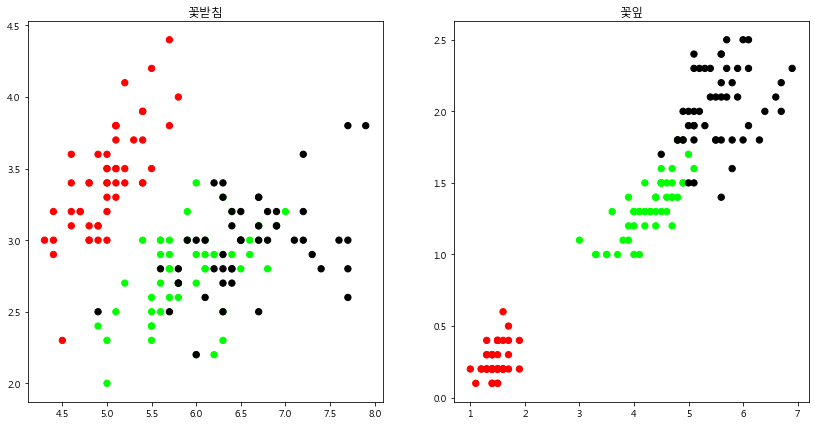

In [32]:
# sepal로 나눌까 petal로 나눌까 그래프로 확인
colormap = np.array(["red", "lime", "black"])  #> 붓꽃 종류에 따라 색상으로 구분

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽃잎")

In [48]:
model = KMeans(n_clusters=3).fit(X)

In [49]:
model.labels_  #> 모델 스스로 찾은 결과값

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '결과')

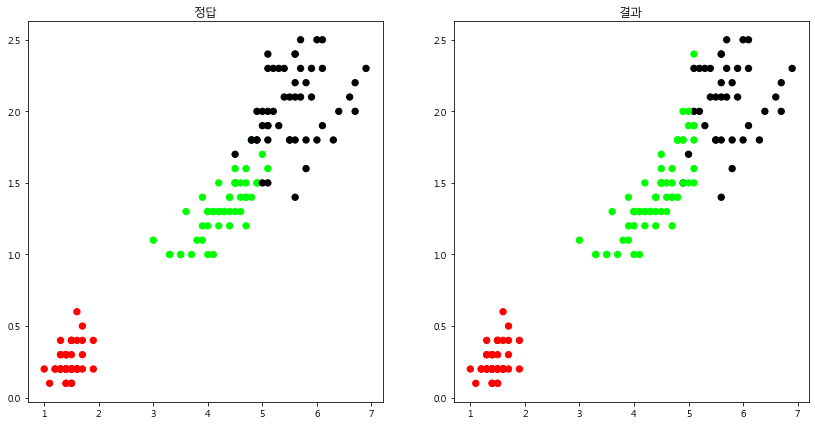

In [50]:
colormap = np.array(["red", "lime", "black"])  #> 붓꽃 종류에 따라 색상으로 구분

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("정답")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s=40)
plt.title("결과")  #> 정답과 붓꽃 종류의 순서가 다르다(순서가 안 맞으니 정확도 낮게 나온다)

In [51]:
accuracy_score(y, model.labels_)

0.8933333333333333

In [52]:
confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [53]:
### 사람의 키와 몸무게로 분류

df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [175,80]
df.head(7)

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


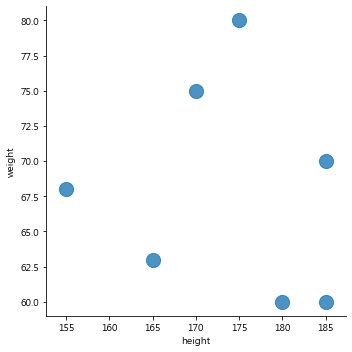

In [54]:
sns.lmplot("height", "weight", data=df, fit_reg=False, scatter_kws={"s":200})

In [66]:
model = KMeans(n_clusters=3).fit(df.values)

In [67]:
model.labels_

array([0, 0, 0, 1, 1, 2, 2])

In [68]:
df["result"] = model.labels_

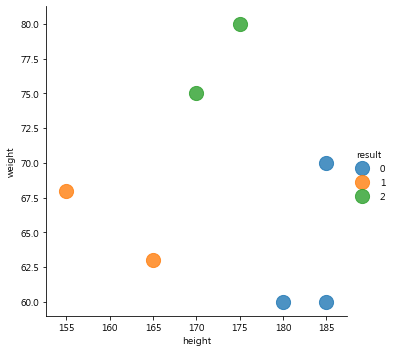

In [69]:
sns.lmplot("height", "weight", data=df, fit_reg=False, scatter_kws={"s":200}, hue="result")